---
title: "Revenue Prediction model"

author: "Garima Sood"

date: "March 12, 2018"

output: html_document


In [2]:
install.packages("gridExtra")
install.packages("dplyr")
install.packages("lubridate")
install.packages("Metrics")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("randomForest")
library(gridExtra)
library(dplyr)
library(lubridate)
library(Metrics)
library(rpart)
library(rpart.plot)
library(randomForest)

Installing package into 'C:/Users/garim/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'gridExtra' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'gridExtra'"


The downloaded binary packages are in
	C:\Users\garim\AppData\Local\Temp\RtmpABEmSb\downloaded_packages


Installing package into 'C:/Users/garim/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"


The downloaded binary packages are in
	C:\Users\garim\AppData\Local\Temp\RtmpABEmSb\downloaded_packages


Installing package into 'C:/Users/garim/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"


The downloaded binary packages are in
	C:\Users\garim\AppData\Local\Temp\RtmpABEmSb\downloaded_packages


Installing package into 'C:/Users/garim/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'Metrics' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Metrics'"


The downloaded binary packages are in
	C:\Users\garim\AppData\Local\Temp\RtmpABEmSb\downloaded_packages


Installing package into 'C:/Users/garim/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"


The downloaded binary packages are in
	C:\Users\garim\AppData\Local\Temp\RtmpABEmSb\downloaded_packages


Installing package into 'C:/Users/garim/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'rpart.plot' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart.plot'"


The downloaded binary packages are in
	C:\Users\garim\AppData\Local\Temp\RtmpABEmSb\downloaded_packages


Installing package into 'C:/Users/garim/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"


The downloaded binary packages are in
	C:\Users\garim\AppData\Local\Temp\RtmpABEmSb\downloaded_packages


Warning message:
"package 'gridExtra' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.4.4"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'Metrics' was built under R version 3.4.4"Warning message:
"package 'rpart' was built under R version 3.4.4"Warning message:
"package 'rpart.plot' was built under R version 3.4.4"Warning message:
"package 'randomForest' was built under R version 3.4.4"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'pack

In [5]:
dataPath <- "C:/Users/garim/Documents/Quarter 2/Data Mining/Project/Merged data"
master_data <- read.csv(paste(dataPath,"master_data_with_imputed_budget_and_revenue.csv", sep = "/"))
summary(master_data)

    movie_id      actor_1_gender  actor_2_gender  actor_3_gender 
 Min.   :     2   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 26412   1st Qu.:1.000   1st Qu.:0.000   1st Qu.:0.000  
 Median : 60013   Median :2.000   Median :1.000   Median :1.000  
 Mean   :108317   Mean   :1.331   Mean   :1.163   Mean   :1.153  
 3rd Qu.:157171   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :469172   Max.   :2.000   Max.   :2.000   Max.   :2.000  
                  NA's   :2420    NA's   :3752    NA's   :4664   
 actor_4_gender  actor_5_gender             actor_1_name  
 Min.   :0.000   Min.   :0.000                    : 2420  
 1st Qu.:0.000   1st Qu.:0.000   John Wayne       :   94  
 Median :1.000   Median :1.000   Jackie Chan      :   73  
 Mean   :1.111   Mean   :1.102   Nicolas Cage     :   60  
 3rd Qu.:2.000   3rd Qu.:2.000   Robert De Niro   :   56  
 Max.   :2.000   Max.   :2.000   GÃ©rard Depardieu:   52  
 NA's   :5799    NA's   :8279    (Other)          :42783  


In [6]:
master_data$release_date <- as.Date(master_data$release_date)

To cut the impact of inflation on movie revenues & budgets, I am excluding data of movies released before Jan 1985

In [7]:
master_data <- master_data[master_data$release_date > as.Date("01/01/1985","%m/%d/%Y"),]
master_data <- master_data[master_data$budget > 0,]
master_data$actor_1_gender <- as.factor(ifelse(master_data$actor_1_gender==0,NA,ifelse(master_data$actor_1_gender==2,"Male","Female")))
master_data$actor_2_gender <- as.factor(ifelse(master_data$actor_2_gender==0,NA,ifelse(master_data$actor_2_gender==2,"Male","Female")))
master_data$actor_3_gender <- as.factor(ifelse(master_data$actor_3_gender==0,NA,ifelse(master_data$actor_3_gender==2,"Male","Female")))
master_data$actor_4_gender <- as.factor(ifelse(master_data$actor_4_gender==0,NA,ifelse(master_data$actor_4_gender==2,"Male","Female")))
master_data$actor_5_gender <- as.factor(ifelse(master_data$actor_5_gender==0,NA,ifelse(master_data$actor_5_gender==2,"Male","Female")))
master_data$director_gender <- as.factor(ifelse(master_data$director_gender==0,NA,ifelse(master_data$director_gender==2,"Male","Female")))
master_data$producer_gender <- as.factor(ifelse(master_data$producer_gender==0,NA,ifelse(master_data$producer_gender==2,"Male","Female")))
master_data$collection <- as.factor(ifelse(nchar(as.character(master_data$belongs_to_collection))>0,"Yes","No"))
master_data$num_prod_comp <-(master_data$production_company_1!="")+(master_data$production_company_2!="")+
                            (master_data$production_company_3!="")

master_data$num_prod_ctry <-(master_data$production_country_1!="")+(master_data$production_country_2!="")+
                            (master_data$production_country_3!="")

master_data$release_month <- month.abb[month(master_data$release_date)]

master_data <- master_data[ , -which(names(master_data) %in% 
              c( "movie_id" ,"actor_1_name","actor_2_name","actor_3_name","actor_4_name","actor_5_name","director_name","producer_name",
                 "casting_gender","casting_name","belongs_to_collection","genre_2","genre_3","genre_4","production_company_1",
                 "production_company_2","production_company_3" ,"production_country_1", "production_country_2",  "production_country_3" , "spoken_language_1","spoken_language_2", "spoken_language_3" ,"homepage","imdb_id" ,"original_title","overview","poster_path", "status","title","video"))]

Looking at the distribution of data in different variables:

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1508 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1508 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1508 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1508 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1508 rows containing non-finite values (stat_bin)."

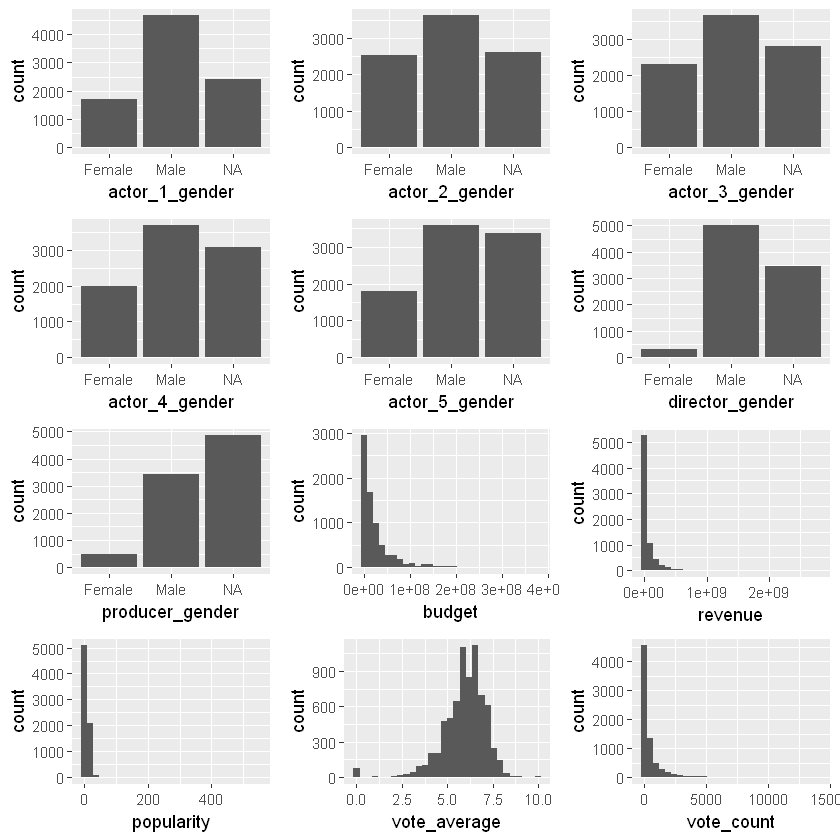

In [8]:
require(ggplot2)

p1<- ggplot(master_data, aes(x = actor_1_gender)) + geom_bar()
p2<- ggplot(master_data, aes(x = actor_2_gender)) + geom_bar()
p3<- ggplot(master_data, aes(x = actor_3_gender)) + geom_bar()
p4<- ggplot(master_data, aes(x = actor_4_gender)) + geom_bar()
p5<- ggplot(master_data, aes(x = actor_5_gender)) + geom_bar()
p6<- ggplot(master_data, aes(x = director_gender)) + geom_bar()
p7<- ggplot(master_data, aes(x = producer_gender)) + geom_bar()
p8<- ggplot(master_data, aes(x = budget)) + geom_histogram()
p9<- ggplot(master_data, aes(x = revenue)) + geom_histogram()
p10<-ggplot(master_data, aes(x = popularity)) + geom_histogram()
p11<-ggplot(master_data, aes(x = vote_average)) + geom_histogram()
p12<-ggplot(master_data, aes(x = vote_count)) + geom_histogram()


grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12, nrow = 4, ncol=3)

Plots show that there are a lot of NA values in the different columns. Counting the NA values per column in the data

In [10]:
perc_na <- function(x){
  return(sum(is.na(x))/length(x))
}

round(apply(master_data, 2, function(x) perc_na(x)),2)


actor_1_gender    actor_2_gender    actor_3_gender    actor_4_gender 
             0.27              0.30              0.32              0.35 
   actor_5_gender   director_gender   producer_gender           genre_1 
             0.39              0.39              0.55              0.17 
            adult            budget original_language        popularity 
             0.17              0.17              0.17              0.17 
     release_date           revenue           runtime           tagline 
             0.17              0.17              0.17              0.17 
     vote_average        vote_count        collection     num_prod_comp 
             0.17              0.17              0.17              0.17 
    num_prod_ctry     release_month          na_count 
             0.17              0.17              0.00

In [11]:
master_data$na_count <- apply(master_data, 1, function(x) sum(is.na(x)))
table(master_data$na_count)


   0    1    2    3    4    5    6    7    8   22 
2550 1895 1053  571  386  300  262  244    4 1508 

Deleting records with missing data in more than 9 columns, and checking the poportion of missing values in the updated data set

In [12]:
data <- master_data[master_data$na_count<9,]
dim(data)

round(apply(data, 2, function(x) perc_na(x)),2)

[1] 7265   23

actor_1_gender    actor_2_gender    actor_3_gender    actor_4_gender 
             0.12              0.15              0.18              0.22 
   actor_5_gender   director_gender   producer_gender           genre_1 
             0.26              0.27              0.46              0.00 
            adult            budget original_language        popularity 
             0.00              0.00              0.00              0.00 
     release_date           revenue           runtime           tagline 
             0.00              0.00              0.00              0.00 
     vote_average        vote_count        collection     num_prod_comp 
             0.00              0.00              0.00              0.00 
    num_prod_ctry     release_month          na_count 
             0.00              0.00              0.00

After removing these records, we are left with about 10% missing values in the gender column of lead actors, and 24% missing values in budget. Rest of the columns look good. 

Checking the distribution of our dependent variable (revenue)

Group.1,x,size
1,0.0,1453
2,107560.2,1453
3,8069558.4,1453
4,44018587.8,1453
5,264762403.1,1453


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


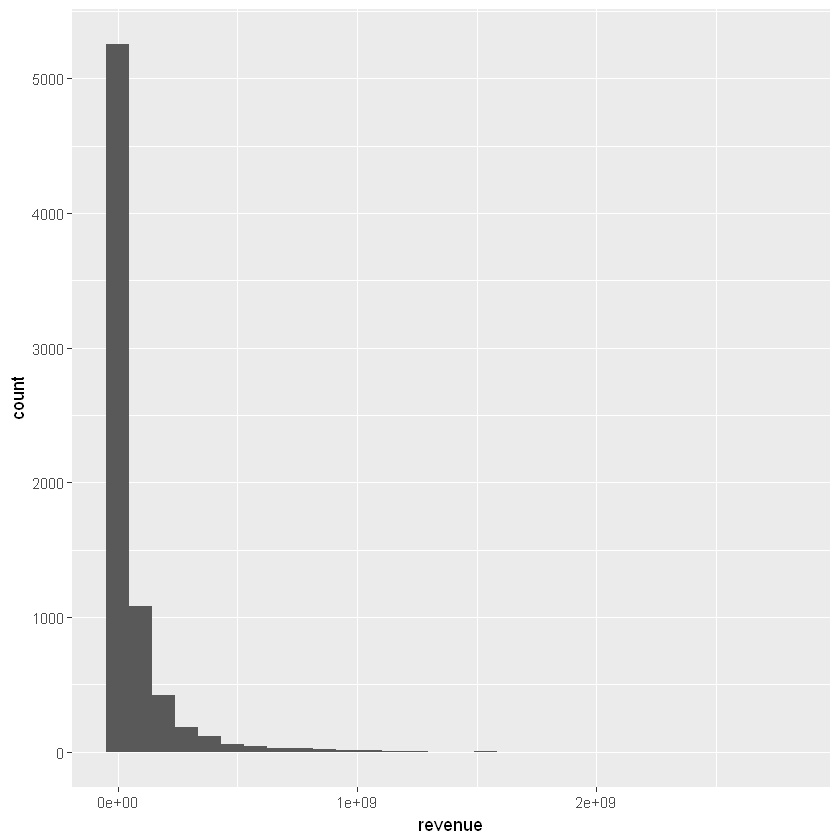

In [13]:
data$quartile <- ntile(data$revenue, 5)
size = as.matrix(table(data$quartile))
cbind(aggregate(data$revenue, by = list(data$quartile), mean), size)
ggplot(data, aes(x = revenue)) + geom_histogram()


Missing value estimation:

In [16]:
mean_impute <- function(x){
  a<- (mean(x[!is.na(x)]))
  x <- ifelse(is.na(x), a, x)
  return(x)
}

median_impute <-  function(x){
  a<- (median(x[!is.na(x)]))
  x <- ifelse(is.na(x), a, x)
  return(x)
}

mode_impute <-  function(x){
  ux <- (unique(x))
  a<-ux[which.max(tabulate(match(x[!is.na(x)], ux)))]
  x <- ifelse(is.na(x), a, x)
  return(x)
}

data.imp <-data

#### Imputing missing data in gender and runtime columns using mode and median respectively

In [18]:
data.imp$actor_1_gender <- as.factor(mode_impute(data$actor_1_gender))
data.imp$actor_2_gender <- as.factor(mode_impute(data$actor_2_gender))
data.imp$runtime <- median_impute(data.imp$runtime)

perc_blank <- function(x){
  return(sum(x ==""|x==" ")/length(x))
}
round(apply(data.imp, 2, function(x) perc_blank(x)),2)

actor_1_gender    actor_2_gender    actor_3_gender    actor_4_gender 
             0.00              0.00                NA                NA 
   actor_5_gender   director_gender   producer_gender           genre_1 
               NA                NA                NA              0.02 
            adult            budget original_language        popularity 
             0.00              0.00              0.00              0.00 
     release_date           revenue           runtime           tagline 
             0.00              0.00              0.00              0.26 
     vote_average        vote_count        collection     num_prod_comp 
             0.00              0.00              0.00              0.00 
    num_prod_ctry     release_month          na_count          quartile 
             0.00              0.00              0.00              0.00

Removing the extreme budget records

In [19]:
sd.budget <- sqrt(var(data.imp$budget))
sd.budget*6
length(data.imp$budget[data.imp$budget>2e+08])
data.imp <- data.imp[data.imp$budget<2e+08,]

[1] 220472844

[1] 32

In [20]:
data.final <-data.imp[,-which(names(data.imp) %in% c( "actor_2_gender", "actor_3_gender", "actor_4_gender", "actor_5_gender",  "director_gender", "producer_gender", 'na_count', 'genre_1', 'adult','tagline','original_language'))]
data.final$actor_1_gender <- as.factor(ifelse(data.final$actor_1_gender==2, "Male", "Female"))

#### Splitting the data into test & train

In [21]:
data.final$budget <- scale(data.final$budget)

c <- round(nrow(data.final)*0.7,0)
s <- sample(1:nrow(data.final), c)

train <- data.final[s,]
test <- data.final[-s,]

#### Building a model to predict revenue of the movie before it is released. I will not model the vote count and vote average variables as they are collected after the release of the movie.

***Building a multiple linear model for revenue prediction:***

Checking the relationship between revenue and predictor variables:

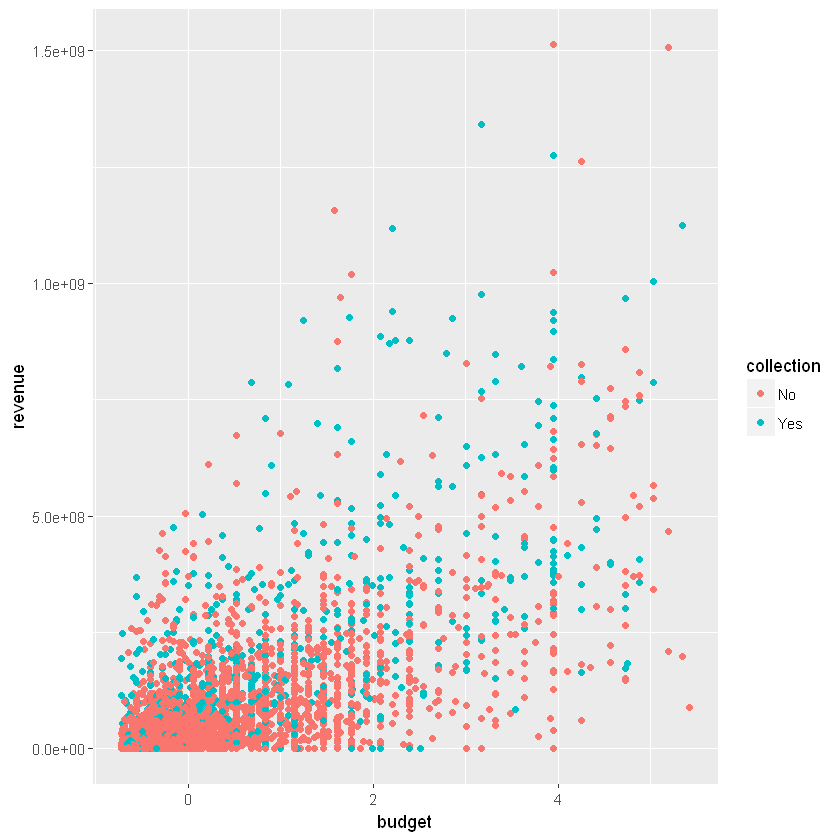

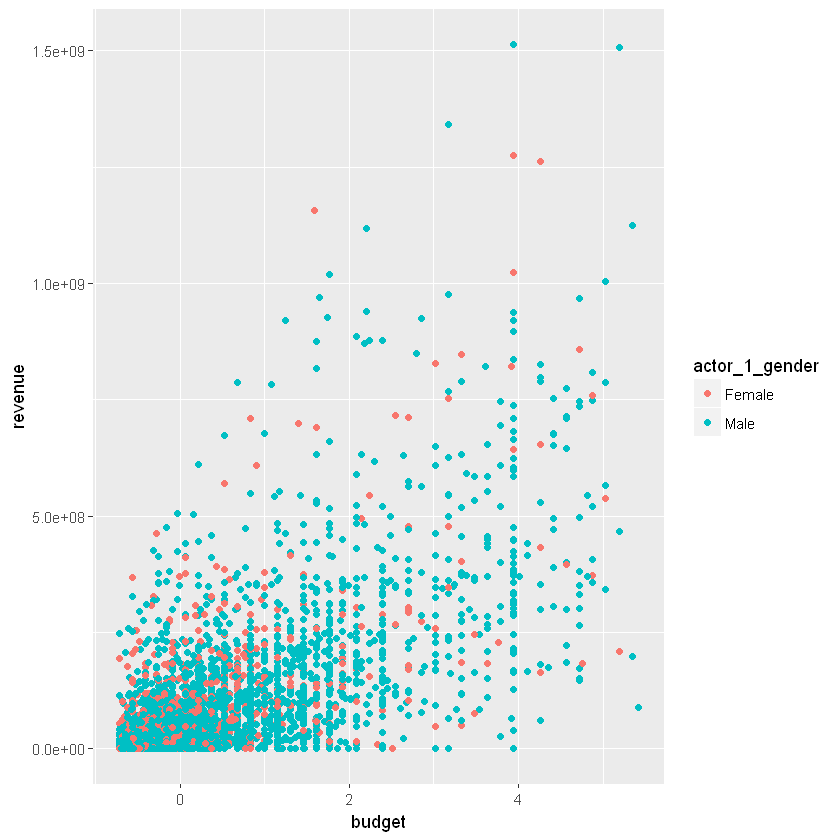

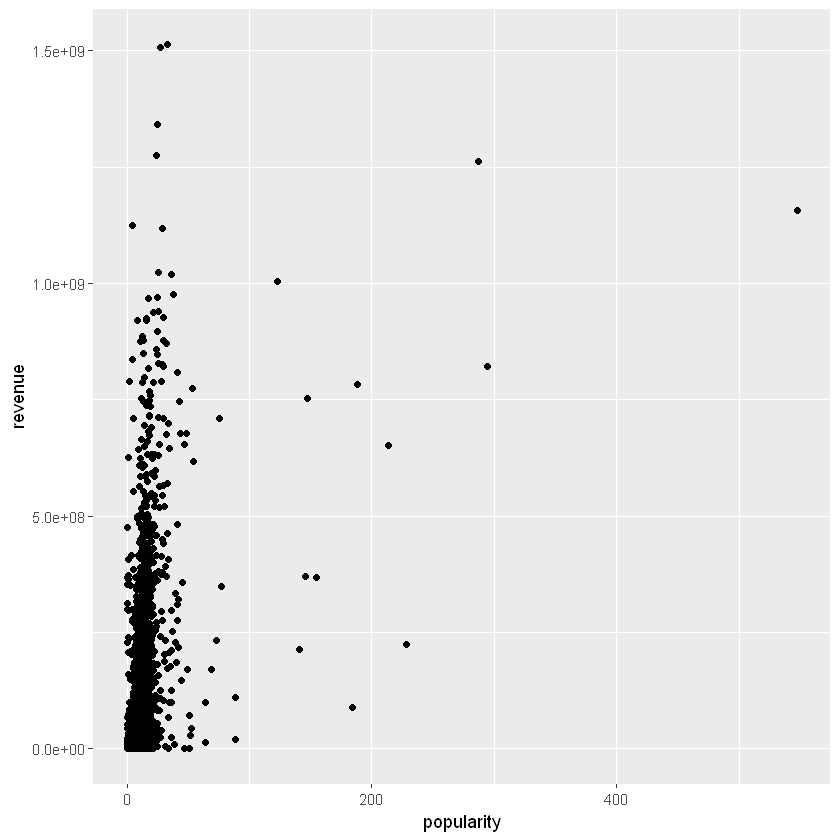

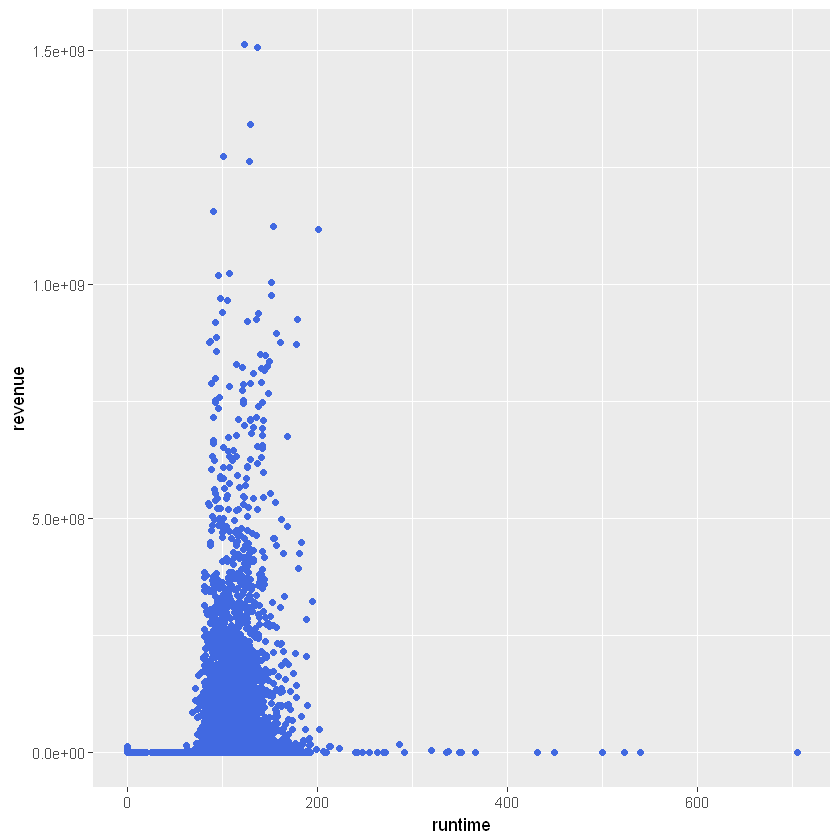

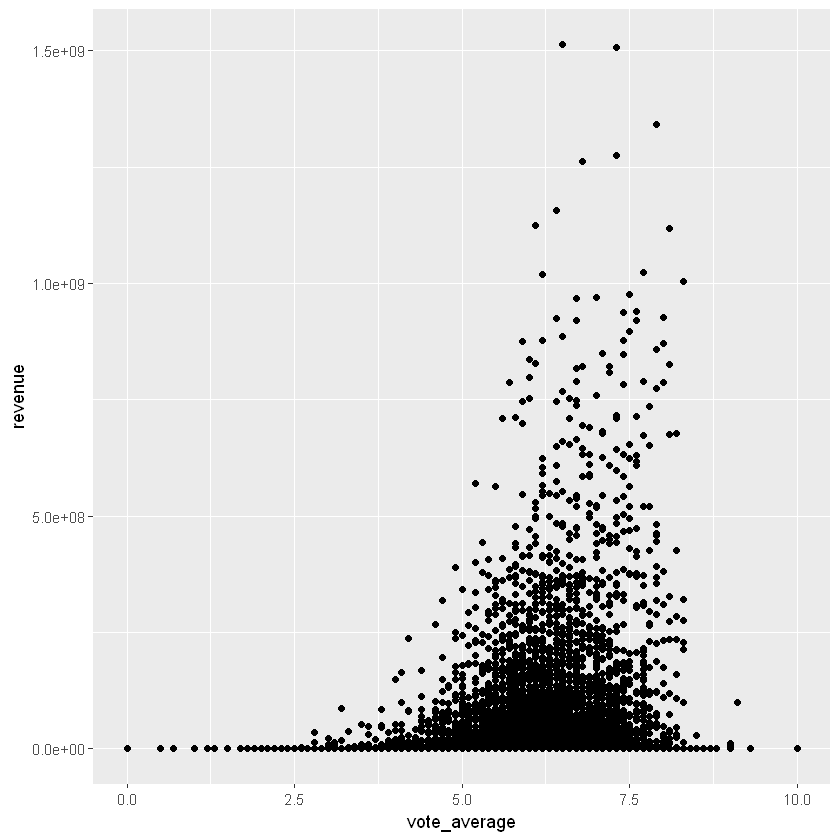

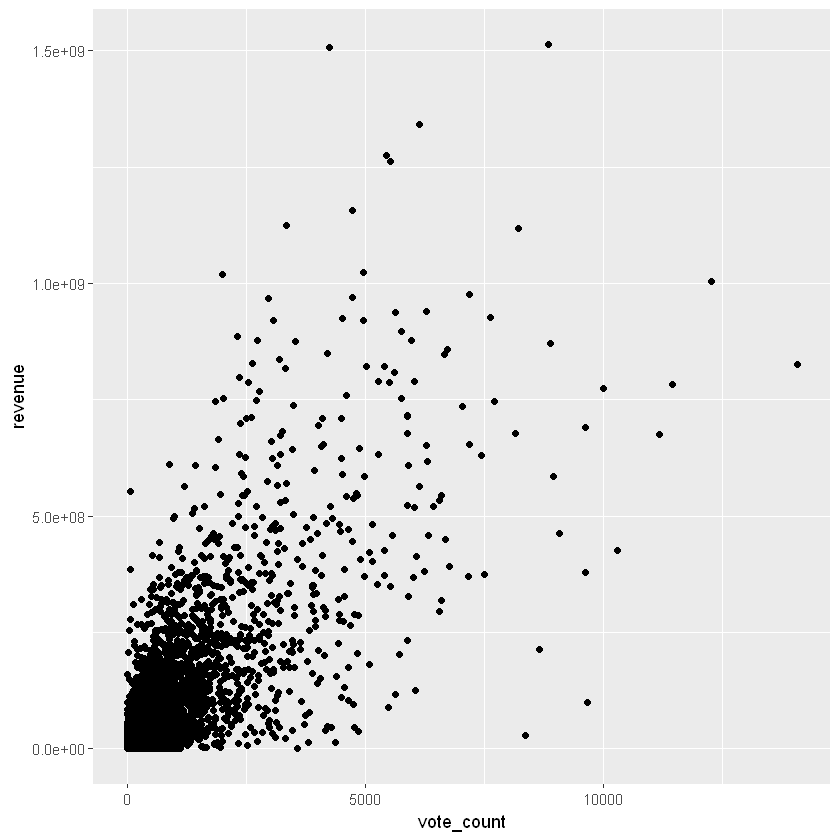

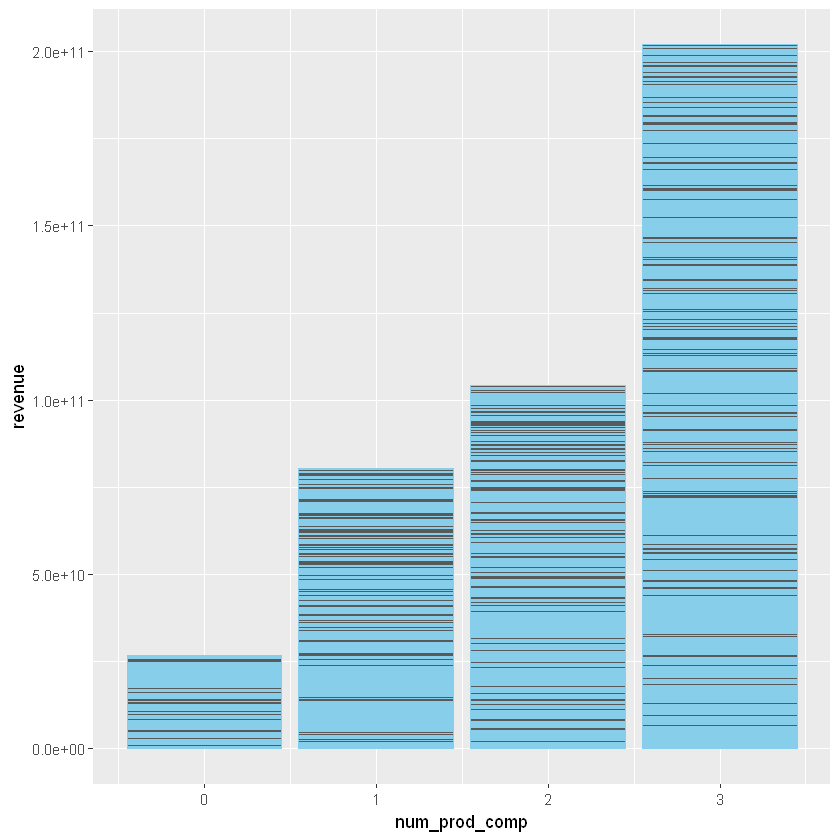

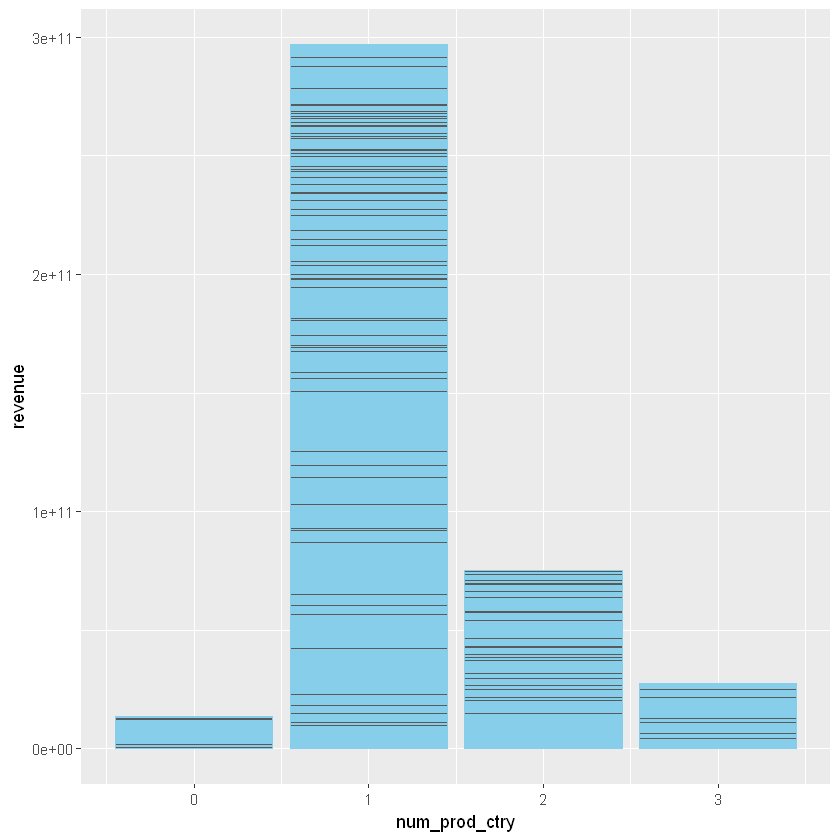

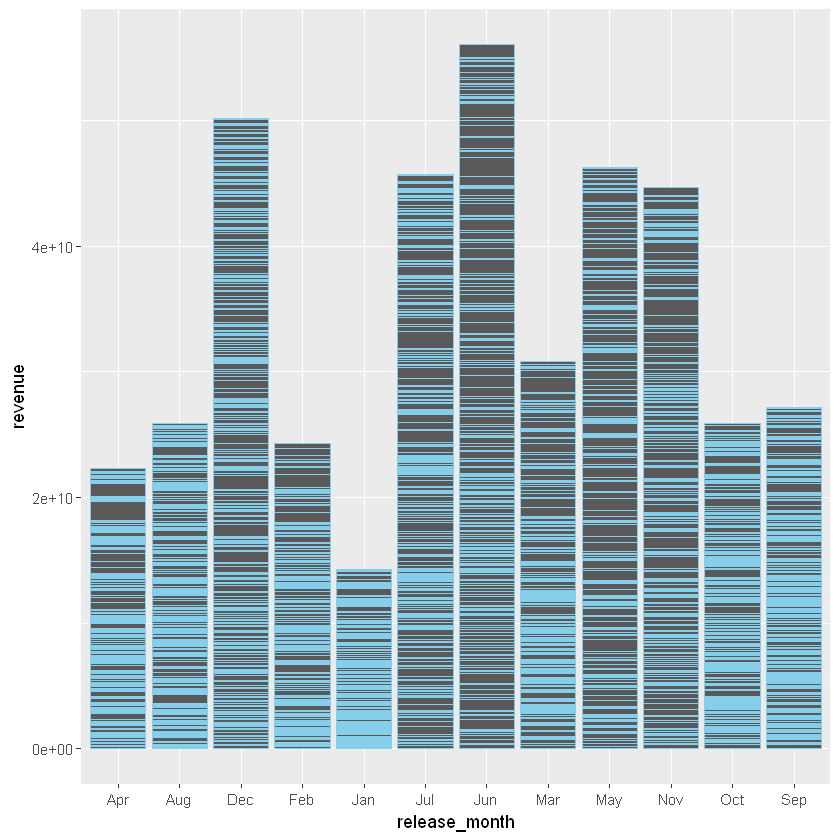

In [22]:
ggplot(data.final,aes(budget,revenue,colour = collection)) + geom_point()
ggplot(data.final,aes(budget,revenue,colour = actor_1_gender)) + geom_point()
ggplot(data.final,aes(popularity,revenue)) + geom_point()
ggplot(data.final,aes(runtime,revenue)) + geom_point(color = "royal blue")
ggplot(data.final,aes(vote_average,revenue)) + geom_point()
ggplot(data.final,aes(vote_count,revenue)) + geom_point()
ggplot(data.final,aes(num_prod_comp,revenue)) + geom_bar(stat = "identity", color = "sky blue")
ggplot(data.final,aes(num_prod_ctry ,revenue)) + geom_bar(stat = "identity", color = "sky blue")
ggplot(data=data.final, aes(x=release_month, y=revenue)) + geom_bar(stat = 'identity', color = 'sky blue')


Cleary vote count has an increasing relationship with revenue as that indicates # people who went to watch the movie. But I cannot model vote average and vote count for predicting revenue as they are collected after the movie is released

**Fitting a linear model**

In [24]:
revenue_pred <- lm(revenue~ actor_1_gender+ popularity+runtime+collection+num_prod_comp+ budget, data = train)
summary(revenue_pred)

rmseTest <- rmse((predict(revenue_pred, test)),test$revenue)
rmseTrain <-rmse((predict(revenue_pred, train)),train$revenue)

#Validation
cbind(rmseTrain, rmseTest)


Call:
lm(formula = revenue ~ actor_1_gender + popularity + runtime + 
    collection + num_prod_comp + budget, data = train)

Residuals:
       Min         1Q     Median         3Q        Max 
-409765912  -30185376     -68568   17419445 1083279321 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        41057978    5512791   7.448 1.11e-13 ***
actor_1_genderMale -3920216    2760527  -1.420    0.156    
popularity          2510099     114774  21.870  < 2e-16 ***
runtime               24734      43704   0.566    0.571    
collectionYes      42342304    3159785  13.400  < 2e-16 ***
num_prod_comp      -4940559    1086024  -4.549 5.51e-06 ***
budget             79245180    1302434  60.844  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 82280000 on 5040 degrees of freedom
Multiple R-squared:  0.5812,	Adjusted R-squared:  0.5807 
F-statistic:  1166 on 6 and 5040 DF,  p-value: < 2.2e-16


rmseTrain,rmseTest
82224777,76943955



The linear model does not give a good fit and the resons could be:

+ interaction between variables e.g.: popularity is driven by actors, budget is driven by runtime- number of countries in which the movie is launched

+ Scatter plots do not show a perfect linear relationship between the dependent and independent variables

**Fitting a regression tree model**
to take into account the interactions between variables


Regression tree:
rpart(formula = revenue ~ actor_1_gender + popularity + runtime + 
    collection + num_prod_comp + num_prod_ctry + budget, data = train)

Variables actually used in tree construction:
[1] budget     collection popularity

Root node error: 8.1474e+19/5047 = 1.6143e+16

n= 5047 

         CP nsplit rel error  xerror     xstd
1  0.376742      0   1.00000 1.00040 0.074406
2  0.105704      1   0.62326 0.64506 0.047185
3  0.066770      2   0.51755 0.54746 0.034884
4  0.027043      3   0.45078 0.47734 0.032387
5  0.021346      4   0.42374 0.45546 0.030512
6  0.012600      5   0.40239 0.43374 0.029099
7  0.012424      6   0.38979 0.43444 0.029491
8  0.012167      7   0.37737 0.43293 0.029956
9  0.010393      8   0.36520 0.42090 0.029559
10 0.010000      9   0.35481 0.41187 0.029047

Regression tree:
rpart(formula = revenue ~ actor_1_gender + popularity + runtime + 
    collection + num_prod_comp + num_prod_ctry + budget, data = train)

Variables actually used in tree constru

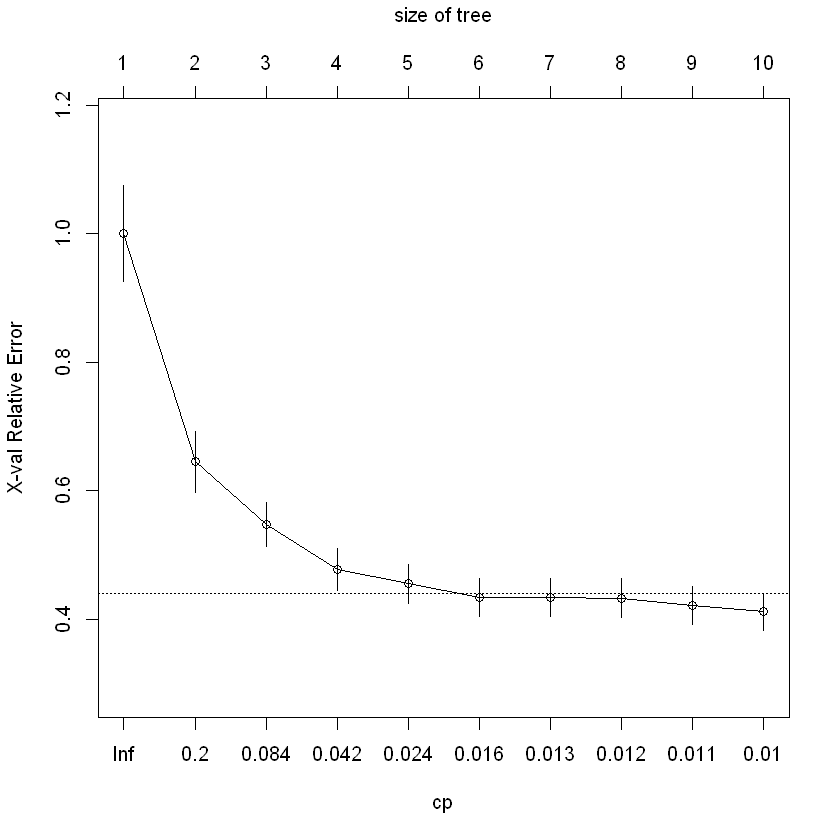

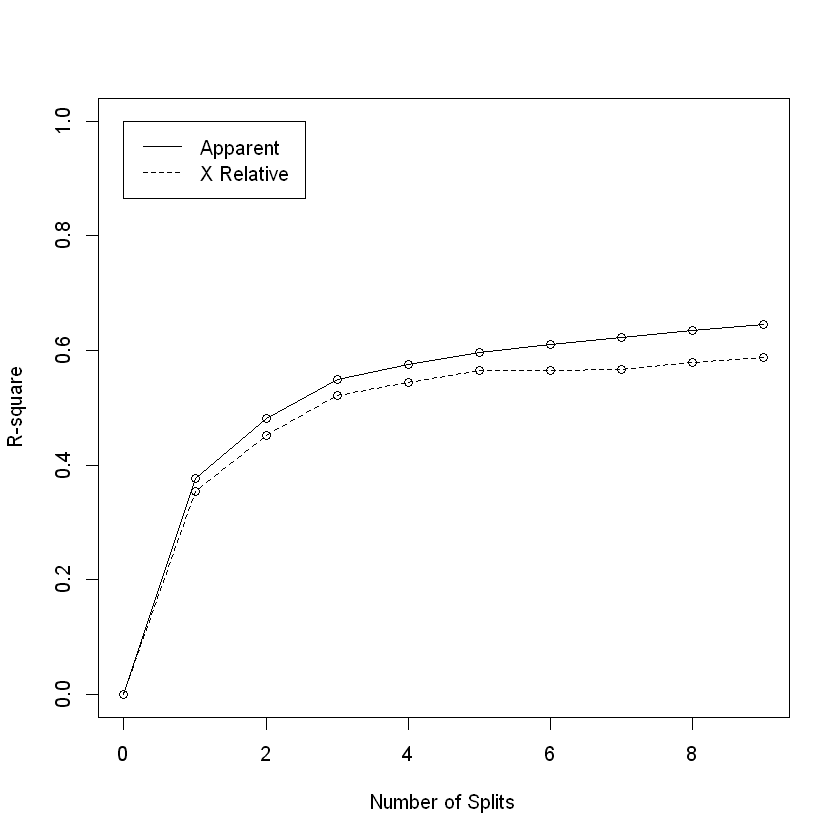

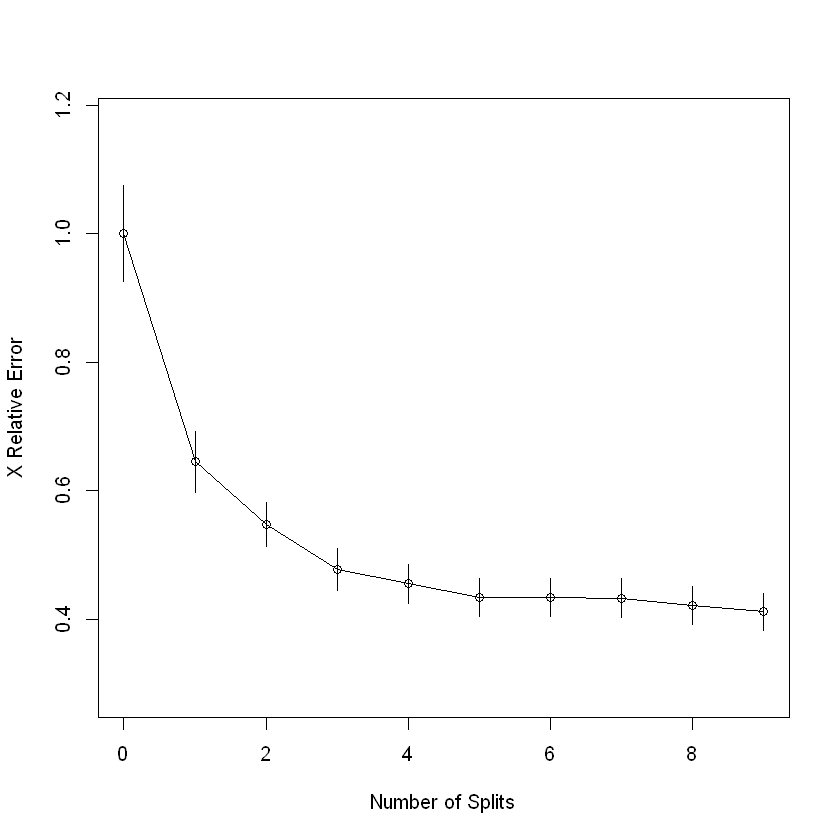

In [25]:
revenue_tree <- rpart(revenue~ actor_1_gender+ popularity+runtime+collection+num_prod_comp+num_prod_ctry + budget , data = train)

plotcp(revenue_tree)
x <- printcp(revenue_tree)

rsq.rpart(revenue_tree)


Retreive optimal cp value based on cross-validated error

In [26]:
opt_index <- which.min(revenue_tree$cptable[, "xerror"])
cp_opt <- revenue_tree$cptable[opt_index, "CP"]

revenue_tree_opt <- prune(tree = revenue_tree, 
                         cp = cp_opt)

Display the pruned tree results


Regression tree:
rpart(formula = revenue ~ actor_1_gender + popularity + runtime + 
    collection + num_prod_comp + num_prod_ctry + budget, data = train)

Variables actually used in tree construction:
[1] budget     collection popularity

Root node error: 8.1474e+19/5047 = 1.6143e+16

n= 5047 

         CP nsplit rel error  xerror     xstd
1  0.376742      0   1.00000 1.00040 0.074406
2  0.105704      1   0.62326 0.64506 0.047185
3  0.066770      2   0.51755 0.54746 0.034884
4  0.027043      3   0.45078 0.47734 0.032387
5  0.021346      4   0.42374 0.45546 0.030512
6  0.012600      5   0.40239 0.43374 0.029099
7  0.012424      6   0.38979 0.43444 0.029491
8  0.012167      7   0.37737 0.43293 0.029956
9  0.010393      8   0.36520 0.42090 0.029559
10 0.010000      9   0.35481 0.41187 0.029047


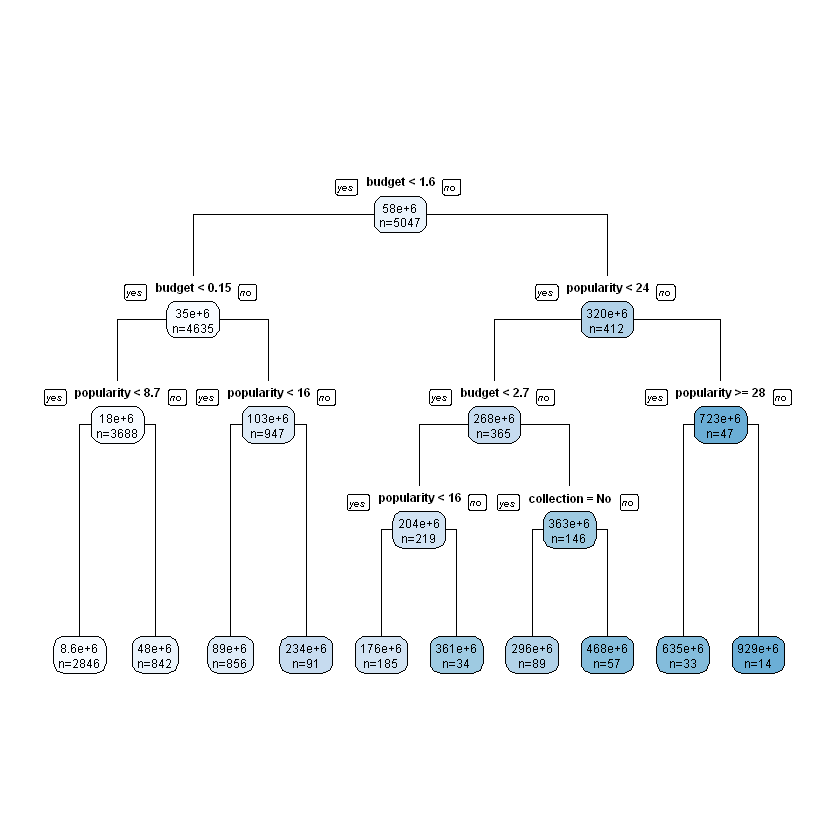

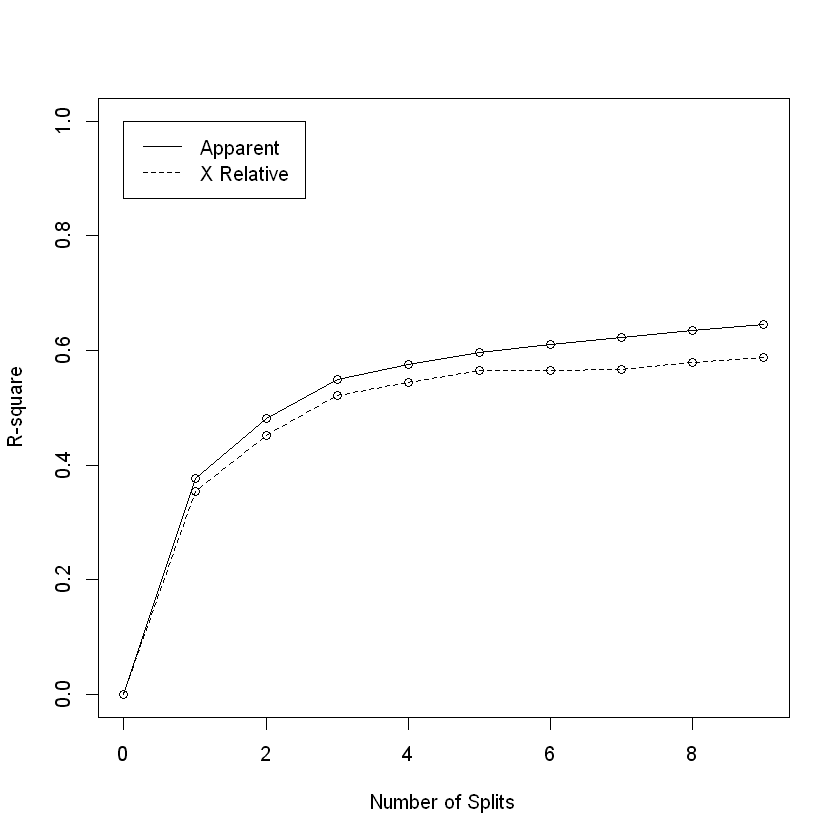

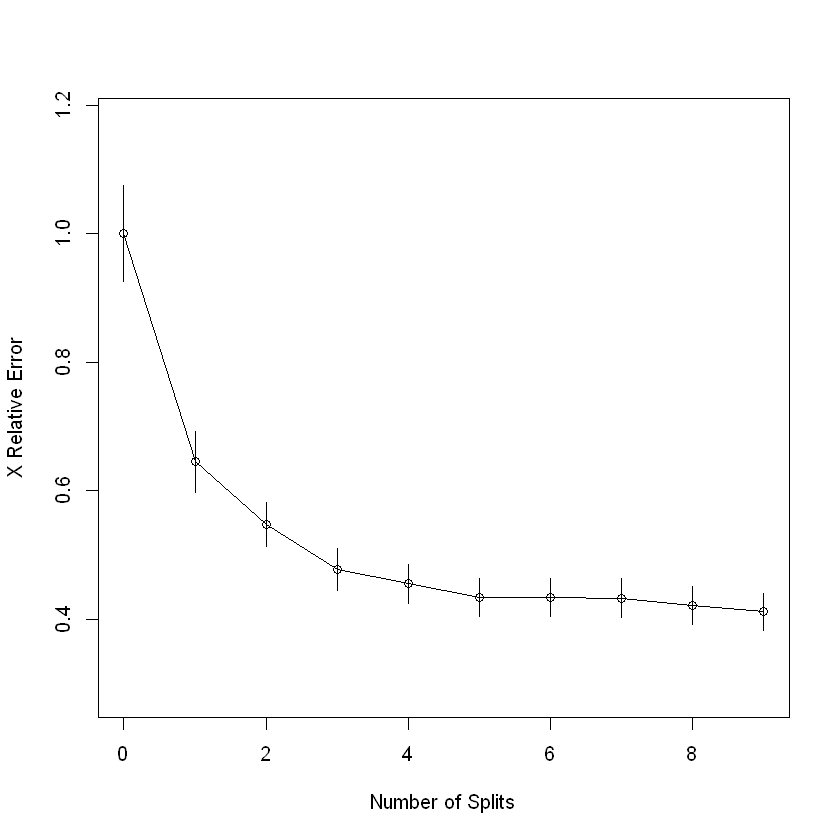

In [27]:
rpart.plot(x = revenue_tree_opt, yesno = 2, type = 1, extra = 1)

rsq.rpart(revenue_tree_opt)

Looking at the accuracy and confusion matrix from tree model (test vs. train)

In [28]:
predictedTest <- predict(revenue_tree_opt, test)
rmseTest <- rmse((test$revenue),predictedTest)
rmseTrain <- rmse((train$revenue),predict(revenue_tree_opt, train))

r_sqTest <- 1-rmseTest^2/var(test$revenue)
r_sqTr <- 1-rmseTrain^2/var(train$revenue)


a<- round(rbind(cbind(rmseTrain, rmseTest), cbind(r_sqTr, r_sqTest)),2)
rownames(a)<- c("RMSE", "R-sq")
colnames(a)<- c("Train", "Test")
a


,Train,Test
RMSE,75681879.46,81553477.54
R-sq,0.65,0.52


#### The fit of regression tree is similar to the linear regression model. I will fit random forests to see if the accuracy can be improved further by bootstrapping: 

In [29]:
rfor1 <- randomForest(revenue~ actor_1_gender+ popularity+runtime+collection+num_prod_comp+num_prod_ctry + budget, data= train)

Looking at the accuracy and confusion matrix from the random forest model (test vs. train)

In [30]:
rfor1
rmseTest <- rmse(predict(rfor1, test), test$revenue)
rmseTrain <- rmse(predict(rfor1, train), train$revenue)
Rsq_test <- 1-(rmseTest)^2/var(test$revenue)
R_sqTr <- 1-(rmseTrain)^2/var(train$revenue)

a<- round(rbind(cbind(rmseTrain, rmseTest), cbind(R_sqTr, Rsq_test)),2)
rownames(a)<- c("RMSE", "R-sq")
colnames(a)<- c("Train", "Test")
a


Call:
 randomForest(formula = revenue ~ actor_1_gender + popularity +      runtime + collection + num_prod_comp + num_prod_ctry + budget,      data = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 5.612575e+15
                    % Var explained: 65.23

,Train,Test
RMSE,43707052.76,68973790.65
R-sq,0.88,0.66


I see overfitting in this model. Let me set the node size to avoid this:

In [31]:
for (i in c(20,25,30,35,40)){

  rfor2 <- randomForest(revenue~ actor_1_gender+ popularity+runtime+collection+num_prod_comp+ budget, data= train, nodesize = i)
  rmseTest <- rmse(predict(rfor2, test), test$revenue)
  rmseTrain <- rmse(predict(rfor2, train), train$revenue)
  Rsq_test <- 1-(rmseTest)^2/var(test$revenue)
  R_sqTr <- 1-(rmseTrain)^2/var(train$revenue)
  
  a<- round(rbind(cbind(rmseTrain, rmseTest), cbind(R_sqTr, Rsq_test)),2)
  rownames(a)<- c("RMSE", "R-sq")
  colnames(a)<- c("Train", "Test")
  print(i)
  print(a)
}

[1] 20
          Train        Test
RMSE 57451194.0 69928693.61
R-sq        0.8        0.65
[1] 25
           Train        Test
RMSE 59965155.46 69897369.82
R-sq        0.78        0.65
[1] 30
           Train        Test
RMSE 61544241.84 70432055.11
R-sq        0.77        0.64
[1] 35
           Train        Test
RMSE 62811259.17 70549707.34
R-sq        0.76        0.64
[1] 40
           Train        Test
RMSE 64241549.18 70661434.91
R-sq        0.74        0.64


I will go with the node size 25. The model fit has clearly improved with random forests compared to the tree model

In [34]:
rfor.f <- randomForest(revenue~ actor_1_gender+ popularity+runtime+collection+num_prod_comp+ budget, data= train, nodesize = 30)
round(rfor.f$importance,2)

,IncNodePurity
actor_1_gender,3.932558e+17
popularity,2.018656e+19
runtime,4.145405e+18
collection,2.890027e+18
num_prod_comp,1.314185e+18
budget,3.132536e+19


Clearly, budget and popularity are the most important predictors followed by whether the movie belowngs to a collection or not

Now since budget is the most important factor here, it is worth checking if importance of different predictors changes if I predict the revenue with different budget buckets. **Performing cluster wise class regression**

In [36]:
#clustreg function
clustreg=function(dat,k,tries,sed,niter){
  
  set.seed(sed)
  dat=as.data.frame(dat)
  rsq=rep(NA,niter)
  res=list()
  rsq.best=0
  for(l in 1:tries) {
    
    c = sample(1:k,nrow(dat),replace=TRUE)
    yhat=rep(NA,nrow(dat))
    for(i in 1:niter) {		
      resid=pred=matrix(0,nrow(dat),k)
      for(j in 1:k){	
        pred[,j]=predict(glm(dat[c==j,],family="gaussian"),newdata=dat)		
        resid[,j] = (pred[,j]-dat[,1])^2
      }
      
      c = apply(resid,1,which.min)
      for(m in 1:nrow(dat)) {yhat[m]=pred[m,c[m]]}
      rsq[i] = cor(dat[,1],yhat)^2	
      #print(rsq[i])
    }
    
    if(rsq[niter] > rsq.best) {	
      rsq.best=rsq[niter]
      l.best=l
      c.best=c
      yhat.best=yhat
    }
  }
  
  for(i in k:1) res[[i]]=summary(lm(dat[c.best==i,]))
  
  return(list(data=dat,nclust=k,tries=tries,seed=sed,rsq.best=rsq.best,number.loops=niter, Best.try=l.best,cluster=c.best,results=res))
}

clustreg.predict=function(results,newdat){
  
  yhat=rep(NA,nrow(newdat))
  resid=pred=matrix(0,nrow(newdat),length(table(results$cluster)))
  
  for(j in 1:length(table(results$cluster))){			
    pred[,j]=predict(glm(results$data[results$cluster==j,],family="gaussian"),newdata=newdat)		
    resid[,j] = (pred[,j]-newdat[,1])^2
  }
  
  c = apply(resid,1,which.min)
  for(m in 1:nrow(newdat)) {yhat[m]=pred[m,c[m]]}
  rsq = cor(newdat[,1],yhat)^2	
  
  return(list(results=results,newdata=newdat,cluster=c,yhat=yhat,rsq=rsq))
  
}

Trying multiple clusters (2 to 5) and assessing fits using approximated R-sq and RMSE

In [37]:
for (i in 2:5){
  
  rev_clust<- clustreg(train[,c(5,1,2,3,6,9,10,11)],i,100,881,50)
  ypredTr<- clustreg.predict(rev_clust, train[,c(5,1,2,3,6,9,10,11)])
  ypredTest <- clustreg.predict(rev_clust,test[,c(5,1,2,3,6,9,10,11)])
  yhat_tr<- ypredTr$yhat
  yhat_test<- ypredTest$yhat
  
  rmseTest <- rmse(yhat_test, test$revenue)
  rmseTrain <- rmse(yhat_tr, train$revenue)
  Rsq_test <- 1-(rmseTest)^2/var(test$revenue)
  R_sqTr <- 1-(rmseTrain)^2/var(train$revenue)
  
  a<- round(rbind(cbind(rmseTrain, rmseTest), cbind(R_sqTr, Rsq_test)),2)
  rownames(a)<- c("RMSE", "R-sq")
  colnames(a)<- c("Train", "Test")
  print(i)
  x <- table(rev_clust$cluster)
  print(x)
  print(a)
  
}

[1] 2

   1    2 
 651 4396 
           Train        Test
RMSE 49885380.47 45591029.11
R-sq        0.85        0.85
[1] 3

   1    2    3 
 260 3632 1155 
           Train        Test
RMSE 34795869.12 33682217.65
R-sq        0.93        0.92
[1] 4

   1    2    3    4 
2206   81  357 2403 
           Train        Test
RMSE 25743321.39 27283464.23
R-sq        0.96        0.95
[1] 5

   1    2    3    4    5 
1845 2332  215   72  583 
           Train        Test
RMSE 20932497.58 22176345.79
R-sq        0.97        0.96


Cluster wise regression is fitting really well. Based on the size of the clusters, I will choose the 3 cluster solution as clusters get thin beyond that.

In [38]:
rev_clust3<- clustreg(train[,c(5,1,2,3,6,9,10,11)],3,100,881,50)
rev_clust3$result

[[1]]

Call:
lm(formula = dat[c.best == i, ])

Residuals:
       Min         1Q     Median         3Q        Max 
-197257730  -50625682   -7809593   15071031  454426707 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        123142469   30589390   4.026 7.52e-05 ***
actor_1_genderMale  20699561   14117812   1.466 0.143840    
budget             110793603    5479514  20.220  < 2e-16 ***
popularity          14285318    1016686  14.051  < 2e-16 ***
runtime              1040359     268189   3.879 0.000134 ***
collectionYes       53695402   15202223   3.532 0.000490 ***
num_prod_comp      -56257984    8785951  -6.403 7.39e-10 ***
num_prod_ctry      -15592542   10275957  -1.517 0.130424    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 103100000 on 252 degrees of freedom
Multiple R-squared:  0.8889,	Adjusted R-squared:  0.8858 
F-statistic: 288.1 on 7 and 252 DF,  p-value: < 2.2e-16


[[2]]

Call:
lm(formu

Plotting clusters on revenue vs. budget class:

Group.1,budget,revenue,popularity,runtime,vote_average,vote_count,num_prod_comp,size.Var1,size.Freq
1,0.6630203,328317292,10.426196,103.7346,6.442308,1854.9731,2.419231,1,260
2,-0.1343536,19984564,6.807126,105.2712,5.843034,262.4199,1.675110,2,3632
3,0.2987147,117489710,9.178632,104.2078,6.074719,916.9299,2.051082,3,1155


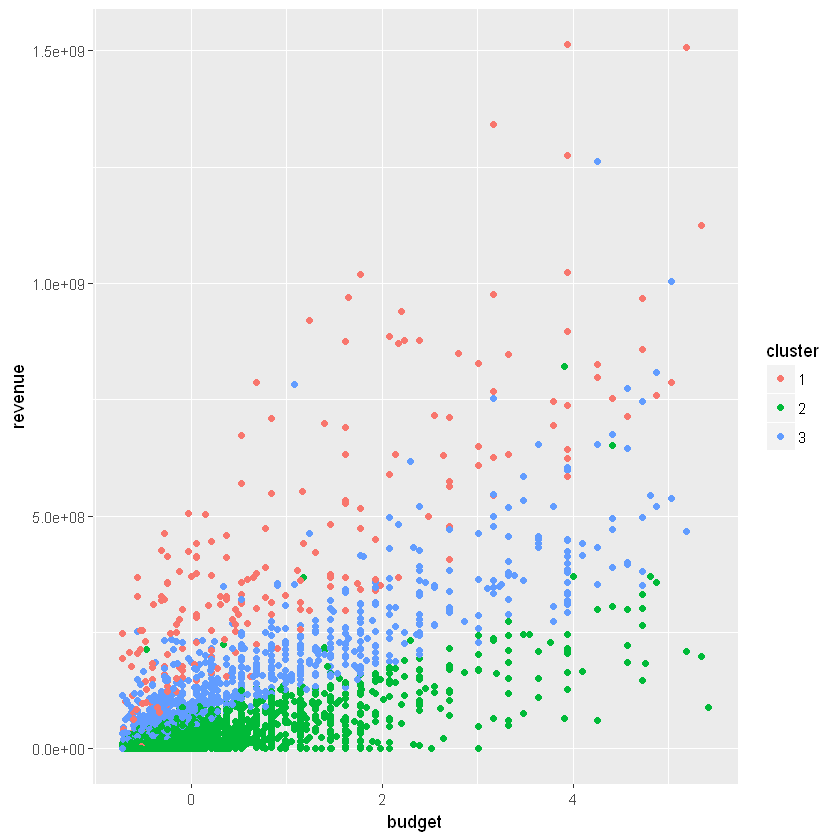

In [39]:
train_clus <- as.data.frame(cbind(train, cluster = rev_clust3$cluster))
train_clus$cluster <- as.factor(train_clus$cluster)
cbind(aggregate(train_clus[,c(2,5,3,6,7,8,10)], by = list(train_clus$cluster), mean), size = table(train_clus$cluster))
ggplot(train_clus,aes(budget,revenue,colour = cluster)) + geom_point()

Now that we know how the regression equations within different clusters of the movies, it is important for us to be able to classify the new movies into clusters and then fit the corresponding equations to then so as to predict their revenue.

***Fitting a classification tree on train data to classify new datasets into clusters for revenue predictions through clusterwise regression results***

In [42]:
s <- sample(1:nrow(train), round(0.7*nrow(train),0))
train1 <- train_clus[s,]
train2 <- train_clus[-s,]

  classify <- randomForest(cluster~ actor_1_gender+ popularity+runtime+collection+num_prod_comp+ budget, data= train1, nodesize = 10)
  train1clus <- predict(classify, train1, type = "class")
  train2clus <- predict(classify, train2, type = "class")
  round(prop.table(table(actual = train1$cluster, pred = train1clus),1),2)
  round(prop.table(table(actual = train2$cluster, pred = train2clus),1),2)
  

      pred
actual    1    2    3
     1 0.15 0.69 0.16
     2 0.00 0.99 0.01
     3 0.00 0.60 0.40

      pred
actual    1    2    3
     1 0.00 0.69 0.31
     2 0.00 0.96 0.04
     3 0.01 0.76 0.23

In [43]:
 accTrain1 <- sum(train1clus==train1$cluster)/nrow(train1); round(accTrain1,2)
 accTrain2 <- sum(train2clus==train2$cluster)/nrow(train2); round(accTrain2,2)


[1] 0.81

[1] 0.74

The accuracy of classification model for deciding clusters is low for small sized clusters. I would weigh in this factor to decide between random forest and cluster wise regression result. The accuracy of predicting revenue once the clusters are identified is very high but when combined with process of identifying the right clusters, expected accuracy drop close to that of random forests.